In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_excel("./BankruptcyData.xlsx")

Taking a look at the data frame:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


### Descriptive Stats for Each Feature:

In [4]:
df.describe(include="all")

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [5]:
# Describing only numeric columns
df.describe(include=[np.number])

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


##### Value counts and Missing Values in each column:

In [6]:

print("Value counts :\n",df.value_counts(), "\n--------------------------\nSum of missing values in each column:\n", df.isna().sum())


Value counts :
 EPS       Liquidity  Profitability  Productivity  Leverage Ratio  Asset Turnover  Operational Margin  Return on Equity  Market Book Ratio  Assets Growth  Sales Growth  Employee Growth  BK
2.43       0.05       0.24           0.09          0.75           0.55             0.17                0.08              43.69              0.067080       0.018128      0.026830        0     2
2.28       0.00       0.12           0.10          1.04           0.33             0.29                0.08              265.59             0.032411       0.072050     -0.011426        0     2
3.66      -0.01       0.13           0.08          0.78           0.49             0.16                0.10              16.70              0.069080      -0.253067     -0.199961        0     2
2.37       0.06       0.24           0.09          0.82           0.58             0.16                0.08              40.08              0.063709       0.058621      0.034496        0     2
2.67      -0.07       0.

There are quite a lot of Missing values, lets look at missing values by each row:

##### Counting missing values in each row: 

In [7]:


na_counts = df.isna().sum(axis=1)

counts = na_counts.value_counts()


c2 = counts.get(2, 0)
c3 = counts.get(3, 0)
c4 = counts.get(4, 0)
c5 = counts.get(5, 0)
cx = na_counts[na_counts > 5].count()



print(f"rows with 2 NaNs: {c2}")
print(f"rows with 3 NaNs: {c3}")
print(f"rows with 4 NaNs: {c4}")
print(f"rows with 5 NaNs: {c5}")
print(f"rows with >5 NaNs: {cx}")



rows with 2 NaNs: 35
rows with 3 NaNs: 5777
rows with 4 NaNs: 882
rows with 5 NaNs: 173
rows with >5 NaNs: 68


#### Lets drop the rows that have 4 or more missing values:

*NOTE TO PROFESSOR: WE ALREADY CLEARNED AND SAVED AS CSV WHICH CAN BE READ AGAIN WITHOUT GOING THROUGH THE STEP AGAIN:*

In [8]:
# Dropping Rows with >= 4 missing values
df = df[na_counts < 4]
print(f"Total No. of rows dropped: {na_counts[na_counts >= 4].count()}")

Total No. of rows dropped: 1123


Saving cleaned dataset for later

In [9]:
df.to_csv("./NewDatset.csv")

##### Using the saved datafile 

In [11]:
df = pd.read_csv("./NewDatset.csv")

##### Lets look into missing values again:

In [12]:
df.isna().sum()

Unnamed: 0               0
EPS                      1
Liquidity                0
Profitability            0
Productivity             0
Leverage Ratio           8
Asset Turnover           0
Operational Margin    4463
Return on Equity         4
Market Book Ratio       26
Assets Growth         5776
Sales Growth          5776
Employee Growth       6080
BK                       0
dtype: int64

In [13]:
df.drop(axis=1, columns=["Unnamed: 0"], inplace=True)

##### Lets replace all missing values to median values: 
Median makes the most sense in this circumstances

In [14]:
df.fillna(df.median(), inplace=True)

##### Lets check for outliers:

Checking and removing all rows that have outliers in at least one column: (Z-Score Method)

**Source**: 
Stack Over Flow:

-   For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
-   It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
-   ( < 3).all(axis=1) checks if, for each row, all column values are within 3 standard deviations from the mean
-   Finally, the result of this condition is used to index the dataframe.


In [15]:
len_before_outlier_removal = len(df)
# Removing outliers from all columns except 'BK'
bk_column = df['BK']
df_without_bk = df.drop('BK', axis=1)
z_scores = np.abs(stats.zscore(df_without_bk))
df_no_outliers = df_without_bk[(z_scores < 3).all(axis=1)]

print(f"Outliers removed \n\n total outliers row removed = {len_before_outlier_removal-len(df)}")
# Re-adding the 'BK' column to the DataFrame
df_no_outliers['BK'] = bk_column.loc[df_no_outliers.index]


df = df_no_outliers

Outliers removed 

 total outliers row removed = 0


C:\Users\srive\AppData\Local\Temp\ipykernel_25804\3123567538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['BK'] = bk_column.loc[df_no_outliers.index]


#### Correlation of our Dataset:

In [16]:
pearson = df.corr(method="pearson", numeric_only=True)
spearman = df.corr(method = "spearman", numeric_only=True)
print(f"Pearson Correlation (data doesnt have to be normalized): {pearson}")
print(f"\n\n\nSpearman Correlation (Non-parametric): {spearman}")

Pearson Correlation (data doesnt have to be normalized):                          EPS  Liquidity  Profitability  Productivity  \
EPS                 1.000000   0.002291       0.004201      0.007538   
Liquidity           0.002291   1.000000       0.597361      0.543289   
Profitability       0.004201   0.597361       1.000000      0.550656   
Productivity        0.007538   0.543289       0.550656      1.000000   
Leverage Ratio     -0.000727   0.005987       0.009434      0.011102   
Asset Turnover      0.002977   0.001567       0.021842      0.054903   
Operational Margin  0.006199   0.057517       0.080457      0.136268   
Return on Equity    0.161185   0.054222       0.016624      0.026470   
Market Book Ratio   0.005059   0.033770       0.043843      0.070644   
Assets Growth      -0.000416  -0.009252      -0.011011     -0.020181   
Sales Growth       -0.003732   0.000239      -0.002862     -0.014346   
Employee Growth    -0.014799   0.011031       0.015266      0.007204   
BK     

##### Visualizing the Correlation with Heatmap

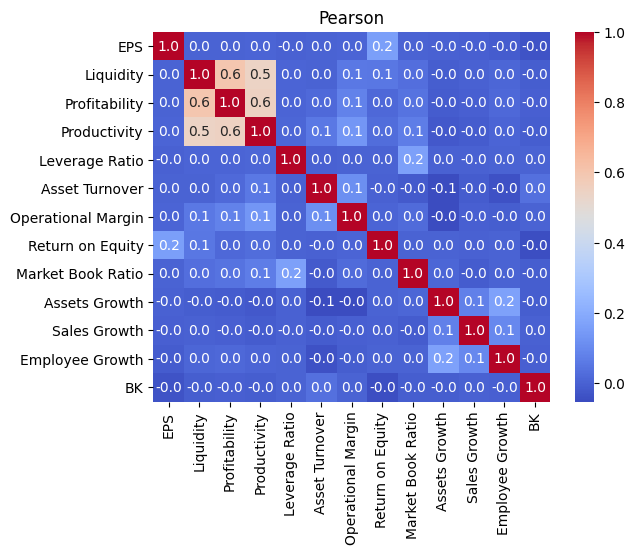

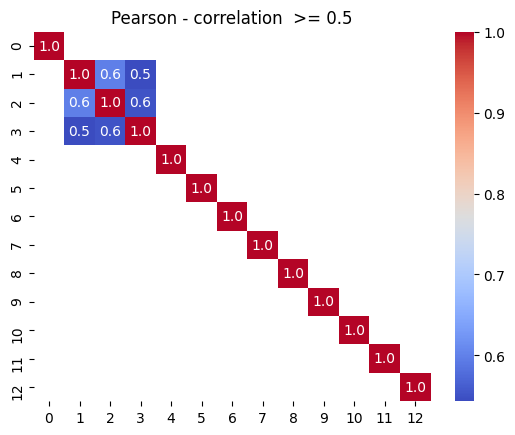

c:\Users\srive\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\srive\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


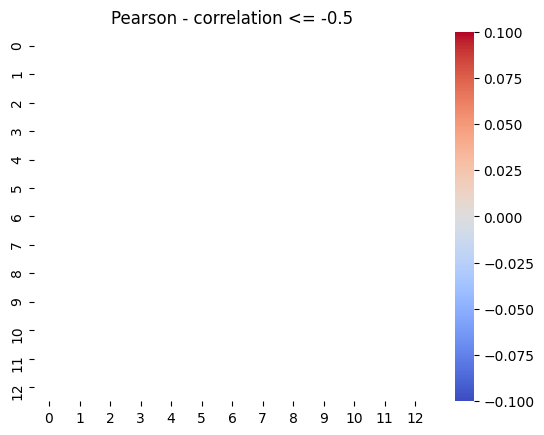

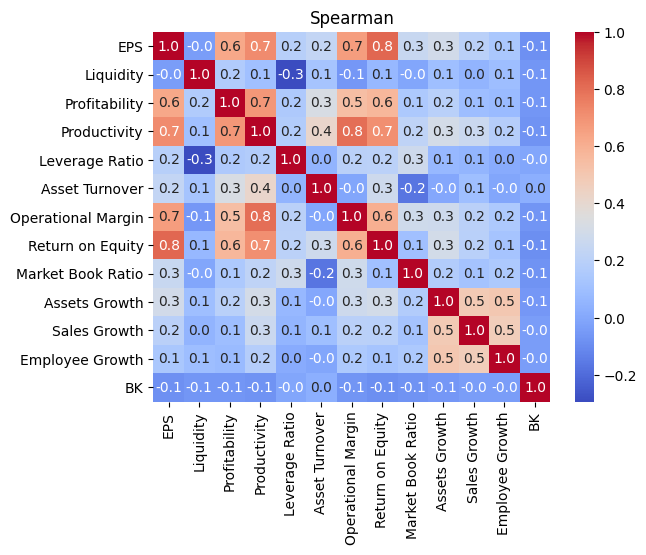

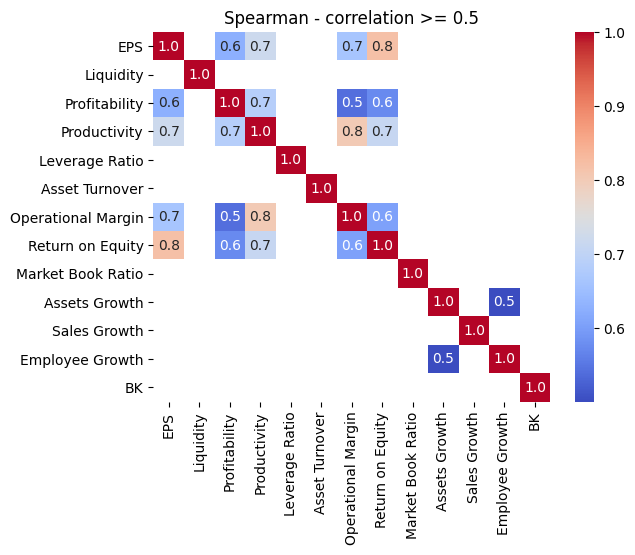

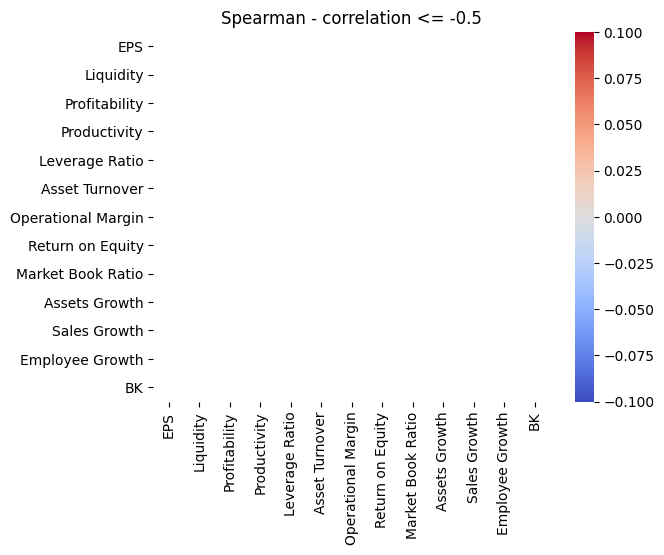

In [17]:
# Visualizing in HEATMAP:

hp  = sns.heatmap(pearson, annot=True, fmt=".1f", cmap='coolwarm')
hp.set_title("Pearson")
plt.show()

hp2  = sns.heatmap(pearson[pearson>=0.5].values, annot=True, fmt=".1f", cmap='coolwarm')
hp2.set_title("Pearson - correlation  >= 0.5")
plt.show()

hp3  = sns.heatmap(pearson[pearson<=-0.5].values, annot=True, fmt=".1f", cmap='coolwarm')
hp3.set_title("Pearson - correlation <= -0.5")
plt.show()



hs  =sns.heatmap(spearman, annot=True, fmt=".1f", cmap='coolwarm')
hs.set_title("Spearman")
plt.show()

hs2  =sns.heatmap(spearman[spearman>=0.5], annot=True, fmt=".1f", cmap='coolwarm')
hs2.set_title("Spearman - correlation >= 0.5")
plt.show()

hs3  =sns.heatmap(spearman[spearman<=-0.5], annot=True, fmt=".1f", cmap='coolwarm')
hs3.set_title("Spearman - correlation <= -0.5")
plt.show()




#### Scaling the data:

It is important to scale the data for models usch as Logistic Regression 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = df.columns.drop('BK')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

C:\Users\srive\AppData\Local\Temp\ipykernel_25804\969236749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.430759,0.998207,0.934394,0.854698,0.474026,0.362302,0.616577,0.667484,0.499815,0.005303,0.050434,0.024921,0
1,0.430740,0.998207,0.934398,0.854612,0.474012,0.341986,0.616577,0.667471,0.499816,0.005676,0.050349,0.025474,0
2,0.430620,0.998095,0.934370,0.854270,0.473817,0.337472,0.616558,0.667412,0.499817,0.006895,0.050925,0.038364,0
3,0.430664,0.997983,0.934375,0.854270,0.473656,0.319413,0.616568,0.667418,0.499837,0.004935,0.050105,0.022141,0
4,0.430668,0.998347,0.934370,0.854270,0.473236,0.309255,0.616568,0.667412,0.499861,0.006215,0.050592,0.025788,0


##### Checking Balance of data: BK Column (our dependent variable)

In [19]:
df["BK"].value_counts()

0    90140
1      543
Name: BK, dtype: int64

##### There are 91,195 rows with "0" or "False" and only 554 rows with "1" or "True"

##### Using SMOTE() Upscample the data

(array([72117.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 72117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

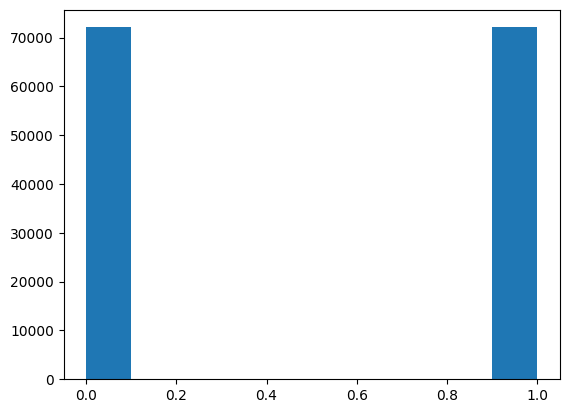

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df.drop('BK', axis=1)
y = df['BK']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

plt.hist(y_train_sm)


##### Performing Logistic regression:


In [21]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_sm,y_train_sm)

c:\Users\srive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Performing cross validation and calculating F-1 Macro Score

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log, X_train, y_train, scoring='f1_macro', cv=10, n_jobs=-1)
print(f"Mean scores: {np.mean(scores)}")

Mean scores: 0.4985172435905307


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_predh=log.predict(X_test)
print(classification_report(y_test, y_predh))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18023
           1       0.01      0.50      0.02       114

    accuracy                           0.70     18137
   macro avg       0.50      0.60      0.42     18137
weighted avg       0.99      0.70      0.82     18137



In [24]:
confusion_matrix(y_test,y_predh)

array([[12714,  5309],
       [   57,    57]], dtype=int64)

In [25]:
from sklearn.metrics import f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

Precision = 0.01
Recall = 0.50
F1 Score Macro = 0.42
AUC = 0.60


##### Applying Random Under sampling
We believe we would also need to perform undersampling :

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_rus,y_train_rus)

LogisticRegression()

In [28]:
scores = cross_val_score(log, X_train, y_train, scoring='f1_macro', cv=10, n_jobs=-1)
print(f"Mean scores: {np.mean(scores)}")

Mean scores: 0.4985172435905307


In [29]:
y_predh=log.predict(X_test)
print(classification_report(y_test, y_predh))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     18023
           1       0.01      0.45      0.02       114

    accuracy                           0.68     18137
   macro avg       0.50      0.57      0.41     18137
weighted avg       0.99      0.68      0.81     18137



In [30]:
confusion_matrix(y_test,y_predh)

array([[12358,  5665],
       [   63,    51]], dtype=int64)

In [31]:
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

Precision = 0.01
Recall = 0.45
F1 Score Macro = 0.41
AUC = 0.57


#### Lets create Multiple models:

c:\Users\srive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\srive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression with Up-Sampling: 0.6358901741837206


c:\Users\srive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


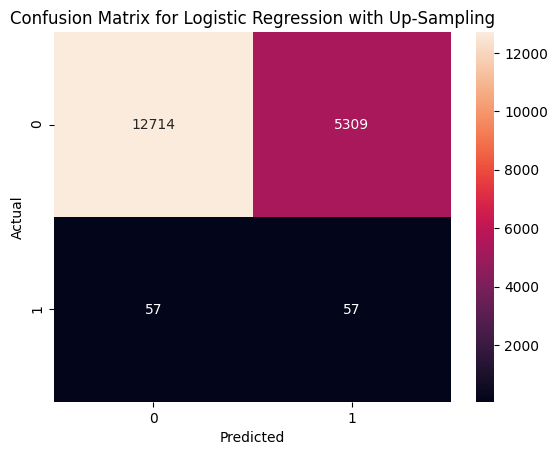

Classification Report for Logistic Regression with Up-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18023
           1       0.01      0.50      0.02       114

    accuracy                           0.70     18137
   macro avg       0.50      0.60      0.42     18137
weighted avg       0.99      0.70      0.82     18137



Logistic Regression with Down-Sampling: 0.605923392612859


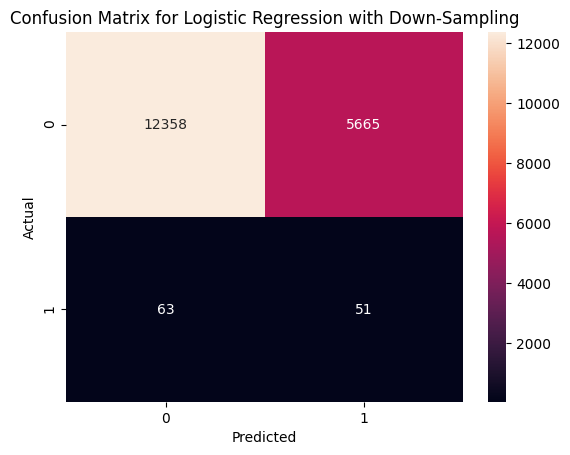

Classification Report for Logistic Regression with Down-Sampling:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     18023
           1       0.01      0.45      0.02       114

    accuracy                           0.68     18137
   macro avg       0.50      0.57      0.41     18137
weighted avg       0.99      0.68      0.81     18137



Naive Bayes with Up-Sampling: 0.5545987414798473


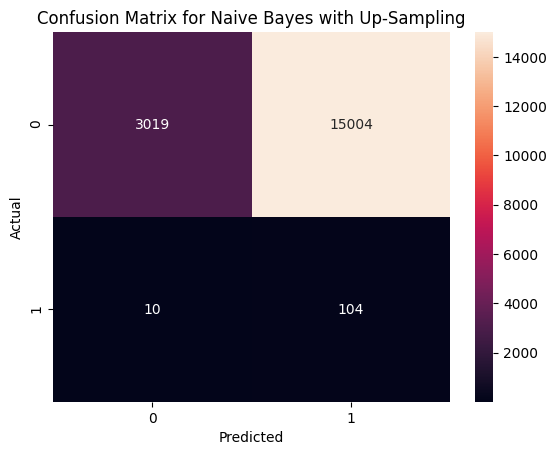

Classification Report for Naive Bayes with Up-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29     18023
           1       0.01      0.91      0.01       114

    accuracy                           0.17     18137
   macro avg       0.50      0.54      0.15     18137
weighted avg       0.99      0.17      0.29     18137



Naive Bayes with Down-Sampling: 0.5768809849521204


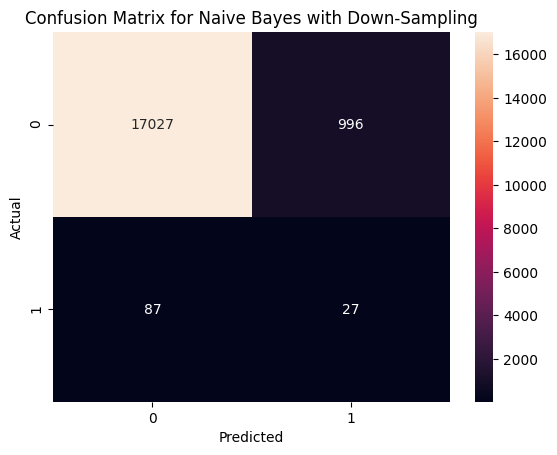

Classification Report for Naive Bayes with Down-Sampling:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     18023
           1       0.03      0.24      0.05       114

    accuracy                           0.94     18137
   macro avg       0.51      0.59      0.51     18137
weighted avg       0.99      0.94      0.96     18137



KNN with Up-Sampling: 0.9697782920251745


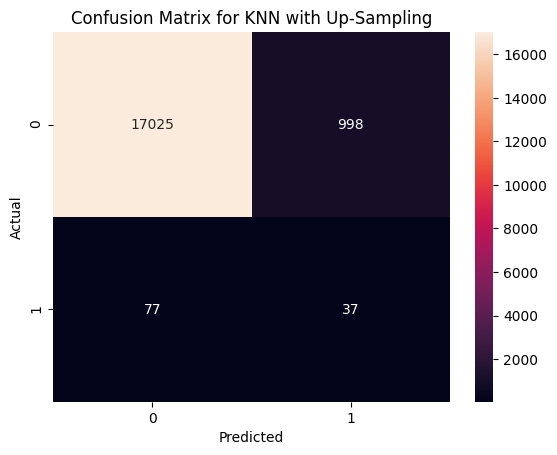

Classification Report for KNN with Up-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     18023
           1       0.04      0.32      0.06       114

    accuracy                           0.94     18137
   macro avg       0.52      0.63      0.52     18137
weighted avg       0.99      0.94      0.96     18137



KNN with Down-Sampling: 0.6852530779753763


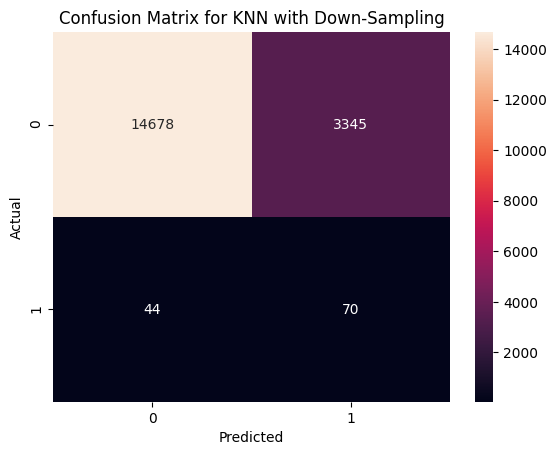

Classification Report for KNN with Down-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     18023
           1       0.02      0.61      0.04       114

    accuracy                           0.81     18137
   macro avg       0.51      0.71      0.47     18137
weighted avg       0.99      0.81      0.89     18137





In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define : Logistic Regression, Naive Bayes, and KNN
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN":KNeighborsClassifier()
}
# Appling Up-Sampling (SMOTE) and Down-Sampling
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)

X_train_up, y_train_up = smote.fit_resample(X_train, y_train)
X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

# training and evaluating different models:
for name, model in models.items():
    model.fit(X_train_up, y_train_up)
    scores_up = cross_val_score(model, X_train_up, y_train_up, cv=10)
    print(f"{name} with Up-Sampling: {scores_up.mean()}")
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name} with Up-Sampling')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {name} with Up-Sampling:\n{report}\n\n')

    model.fit(X_train_down, y_train_down)
    scores_down = cross_val_score(model, X_train_down, y_train_down, cv=10)
    print(f"{name} with Down-Sampling: {scores_down.mean()}")
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name} with Down-Sampling')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {name} with Down-Sampling:\n{report}\n\n')





##### Hyper Parameter Tuning: KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



# Define the KNN model
knn = KNeighborsClassifier()

# Our Parameter Grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


# Up-Sampling pipeline
pipeline_up = Pipeline([
    ('smote', SMOTE()),
    ('knn', knn)
])

# Down-Sampling pipeline
pipeline_down = Pipeline([
    ('under', RandomUnderSampler()),
    ('knn', knn)
])


# Grid Search with Up-Sampling
grid_up = GridSearchCV(pipeline_up, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_up.fit(X_train, y_train)

# Best parameters and score for Up-Sampling
print("Best parameters for Up-Sampling:", grid_up.best_params_)
print("Best score for Up-Sampling:", grid_up.best_score_)

# Grid Search with Down-Sampling
grid_down = GridSearchCV(pipeline_down, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_down.fit(X_train, y_train)

# Best parameters and score for Down-Sampling
print("Best parameters for Down-Sampling:", grid_down.best_params_)
print("Best score for Down-Sampling:", grid_down.best_score_)



Best parameters for Up-Sampling: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Best score for Up-Sampling: 0.06992282647736696
Best parameters for Down-Sampling: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best score for Down-Sampling: 0.042948391779481135


In [34]:



def ClassReport(best_model):
    # Fit the best model
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report for the Best Model:")
    print(report)

ClassReport(grid_up.best_estimator_)
ClassReport(grid_down.best_estimator_)




Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     18023
           1       0.05      0.42      0.08       114

    accuracy                           0.94     18137
   macro avg       0.52      0.68      0.53     18137
weighted avg       0.99      0.94      0.96     18137

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     18023
           1       0.03      0.58      0.05       114

    accuracy                           0.86     18137
   macro avg       0.51      0.72      0.49     18137
weighted avg       0.99      0.86      0.92     18137

